# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Suvrangshu Ghosh
#----------------------
#Modification History:
# Please Use Your API Key in api_keys.py
#----------------------

# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time


#Calculate current date:

#print("Current date "  + time.strftime("%x"))
cur_date = time.strftime("%x")

#-----------------------------------
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#filewrite = open(output_data_file,"w") 

#filewrite.write("Test write" + '\n') #write to txt file

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

628
['avarua', 'ulaangom', 'umm jarr', 'sorland', 'tiksi', 'georgetown', 'rocha', 'mataura', 'punta arenas', 'novoagansk', 'ilfracombe', 'torbay', 'leh', 'qaanaaq', 'nikolskoye', 'kapaa', 'ribeira grande', 'saint george', 'bom jardim', 'yevlax', 'bluff', 'alugan', 'winnemucca', 'tuatapere', 'annau', 'broken hill', 'busselton', 'upernavik', 'vila do maio', 'rikitea', 'coquimbo', 'kuryk', 'magdagachi', 'garissa', 'katsuura', 'the pas', 'srivardhan', 'khuzdar', 'fort-shevchenko', 'hamilton', 'port elizabeth', 'jamestown', 'baijiantan', 'barrow', 'pevek', 'winneba', 'asosa', 'aktash', 'new norfolk', 'longyearbyen', 'haines junction', 'bengkulu', 'naze', 'narsaq', 'basco', 'puerto ayora', 'tuktoyaktuk', 'albany', 'hermanus', 'mezen', 'kavaratti', 'ushuaia', 'san pedro', 'taolanaro', 'san policarpo', 'faanui', 'kudahuvadhoo', 'meulaboh', 'atuona', 'ust-kamchatsk', 'arraial do cabo', 'barcarena', 'chippenham', 'dakar', 'yellowknife', 'lebu', 'mokhotlong', 'severo-kurilsk', 'thompson', 'illoqq

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

#create data frame for weather
weather_df = pd.DataFrame(columns=
                          ['City',
                           'Cloudiness',
                           'Country',
                           'Date',
                           'Humidity',
                           'Lat',
                           'Lng',
                           'Max Temp',
                           'Wind Speed']
                           )
#declare counter to count records and sets (50 record = 1 set)

count = 0
xset = 1
for xcity in cities:
    try:
        if count == 0:
            print("*** Begin of data retrival for set # ", xset, " ***") #print- begin statement at first
            print("_"  * 31,'\n')
            
        count+=1
        api = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_keys.api_key}&q={xcity}"
        
        print(f"Processing Record {count} of Set {xset} | {xcity}")
        print(api)
        if count == 50:
            count = 0
            xset+=1
        response = requests.get(api).json()
        
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]
        
        weather = {
            "City":xcity,
            "Cloudiness":cloudiness,
            "Country":country,
            "Date":date,
            "Humidity":humidity,
            "Lat":lat,
            "Lng":lng,
            "Max Temp":max_temp,
            "Wind Speed":wind_speed}
        
        weather_df = weather_df.append(weather, ignore_index=True)
        
    except:
        print("City not found. Skipping...")
        
print("_"  * 31,'\n')
        
print("*** Data Retrieval Complete ***")

print("_"  * 31,'\n')

    

*** Begin of data retrival for set #  1  ***
_______________________________ 

Processing Record 1 of Set 1 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=avarua
Processing Record 2 of Set 1 | ulaangom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ulaangom
Processing Record 3 of Set 1 | umm jarr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=umm jarr
City not found. Skipping...
Processing Record 4 of Set 1 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sorland
Processing Record 5 of Set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tiksi
Processing Record 6 of Set 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=

Processing Record 4 of Set 2 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=narsaq
Processing Record 5 of Set 2 | basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=basco
Processing Record 6 of Set 2 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=puerto ayora
Processing Record 7 of Set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tuktoyaktuk
Processing Record 8 of Set 2 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=albany
Processing Record 9 of Set 2 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=hermanus
Processing Record 10 of Set 2 | mezen
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 7 of Set 3 | parana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=parana
Processing Record 8 of Set 3 | ambovombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ambovombe
Processing Record 9 of Set 3 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=attawapiskat
City not found. Skipping...
Processing Record 10 of Set 3 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kieta
Processing Record 11 of Set 3 | rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=rawson
Processing Record 12 of Set 3 | jiuquan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=jiuquan
Processing Record 13 of Set 3 | castro
http://api.openweatherma

Processing Record 9 of Set 4 | cravo norte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=cravo norte
Processing Record 10 of Set 4 | krasnoarmeysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=krasnoarmeysk
Processing Record 11 of Set 4 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=chuy
Processing Record 12 of Set 4 | stillwater
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=stillwater
Processing Record 13 of Set 4 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=broome
Processing Record 14 of Set 4 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=hilo
Processing Record 15 of Set 4 | mantua
http://api.openweathermap.org/data/2.5/weath

City not found. Skipping...
Processing Record 11 of Set 5 | barbosa ferraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=barbosa ferraz
Processing Record 12 of Set 5 | boa vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=boa vista
Processing Record 13 of Set 5 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=flin flon
Processing Record 14 of Set 5 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nhulunbuy
Processing Record 15 of Set 5 | banamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=banamba
Processing Record 16 of Set 5 | galgani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=galgani
City not found. Skipping...
Processing R

Processing Record 13 of Set 6 | haibowan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=haibowan
City not found. Skipping...
Processing Record 14 of Set 6 | japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=japura
Processing Record 15 of Set 6 | prokopyevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=prokopyevsk
Processing Record 16 of Set 6 | icanti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=icanti
City not found. Skipping...
Processing Record 17 of Set 6 | okato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=okato
Processing Record 18 of Set 6 | sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sistranda
Processing Record 19 of Set 6 | 

Processing Record 16 of Set 7 | sandnessjoen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sandnessjoen
Processing Record 17 of Set 7 | kajaani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kajaani
Processing Record 18 of Set 7 | marion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=marion
Processing Record 19 of Set 7 | coruripe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=coruripe
Processing Record 20 of Set 7 | bairiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bairiki
City not found. Skipping...
Processing Record 21 of Set 7 | high level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=high level
Processing Record 22 of Set 7 | winona
http://api.

Processing Record 18 of Set 8 | chabahar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=chabahar
Processing Record 19 of Set 8 | oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=oktyabrskiy
Processing Record 20 of Set 8 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=san cristobal
Processing Record 21 of Set 8 | bima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bima
Processing Record 22 of Set 8 | benghazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=benghazi
Processing Record 23 of Set 8 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=dingle
Processing Record 24 of Set 8 | mogwase
http://api.openweathermap.org/data/2.5

Processing Record 20 of Set 9 | peniche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=peniche
Processing Record 21 of Set 9 | barranca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=barranca
Processing Record 22 of Set 9 | maniwaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=maniwaki
Processing Record 23 of Set 9 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=cidreira
Processing Record 24 of Set 9 | taburi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=taburi
City not found. Skipping...
Processing Record 25 of Set 9 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=souillac
Processing Record 26 of Set 9 | zihuatanejo
http://api.openw

Processing Record 22 of Set 10 | haverfordwest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=haverfordwest
Processing Record 23 of Set 10 | grants pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=grants pass
Processing Record 24 of Set 10 | tianpeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tianpeng
Processing Record 25 of Set 10 | jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=jumla
Processing Record 26 of Set 10 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=hirara
Processing Record 27 of Set 10 | tchibanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tchibanga
Processing Record 28 of Set 10 | tigil
http://api.openweathermap.org

Processing Record 24 of Set 11 | rincon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=rincon
Processing Record 25 of Set 11 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=port hedland
Processing Record 26 of Set 11 | san
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=san
Processing Record 27 of Set 11 | karamea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=karamea
City not found. Skipping...
Processing Record 28 of Set 11 | rongcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=rongcheng
Processing Record 29 of Set 11 | elliot lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=elliot lake
Processing Record 30 of Set 11 | gazli
http://ap

Processing Record 27 of Set 12 | yovon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=yovon
Processing Record 28 of Set 12 | wajir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=wajir
Processing Record 29 of Set 12 | buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=buchanan
Processing Record 30 of Set 12 | kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kapit
Processing Record 31 of Set 12 | joshimath
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=joshimath
Processing Record 32 of Set 12 | lodwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=lodwar
Processing Record 33 of Set 12 | port townsend
http://api.openweathermap.org/data/2.5/weather?un

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#check dataframe 
weather_df.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [5]:
#Export the city data into a .csv.
weather_df.to_csv(output_data_file)
#Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,avarua,0,CK,1549927800,70,-21.21,-159.78,84.20,12.75
1,ulaangom,24,MN,1549930449,45,49.98,92.07,-32.10,0.72
2,sorland,75,NO,1549925400,64,67.67,12.69,33.80,21.92
3,tiksi,44,RU,1549930449,74,71.64,128.87,-17.11,13.13
4,georgetown,75,GY,1549926000,83,6.80,-58.16,77.00,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

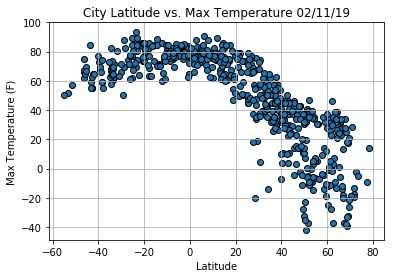

In [6]:
#scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors = 'black')

plt.grid()
plt.title("City Latitude vs. Max Temperature " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('output_data/Latitude_MaxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

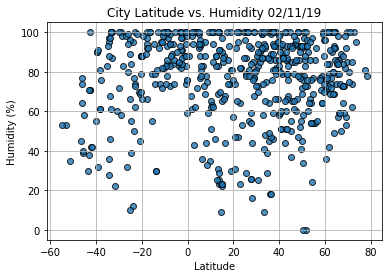

In [7]:
#scatter plot latitude Vs Humidity

plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Humidity " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('output_data/Latitude_Humidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

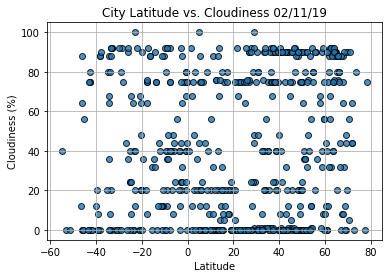

In [8]:
#scatter plot latitude Vs Cloudniess
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Cloudiness " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('output_data/Latitude_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

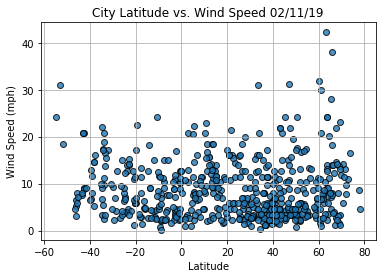

In [9]:
#scatter plot latitude Vs Wind Speed 
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Wind Speed " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('output_data/Latitude_Wind_Speed.png')
plt.show()